In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

# Parâmetros
TEST_SIZE = 0.2 
RANDOM_SEED = 42

In [39]:
# Leitura dos dados
df_kc_housing= pd.read_csv('kc_house_data.csv', usecols=['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement'])
df_kc_housing.head()

# Exportando como csv
mask_dup=df_kc_housing.loc[:,'id'].duplicated(keep=False)
df_dup=df_kc_housing.loc[mask_dup,:]
df_dup.to_csv('df_dup.csv')

# Manipulação de Dados
df_drop_dup=df_kc_housing.drop_duplicates(subset='id', keep='first')
df_drop_dup.set_index('id',inplace=True)

In [40]:
# separando entre features e labels
X = df.drop(columns='price')
y = df.loc[:, 'price']

# separando entre dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_SEED)

# instanciando com cada alpha
gbr_lower = GradientBoostingRegressor(random_state=RANDOM_SEED, loss='quantile', alpha=0.05)
gbr_median = GradientBoostingRegressor(random_state=RANDOM_SEED, loss='quantile', alpha=0.5)
gbr_upper = GradientBoostingRegressor(random_state=RANDOM_SEED, loss='quantile', alpha=0.95)

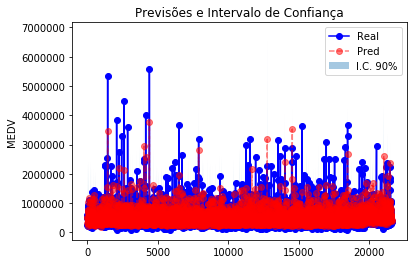

Perc valores fora do I.C: 10.18%


In [41]:
# lista modelos e nomes
list_models = [('Lower_Bound', gbr_lower),
                ('Median', gbr_median),
                ('Upper_Bound', gbr_upper)]

# dataframe vazio para inserirmos as previsoes dos dados de teste
df_test = pd.DataFrame()
df_test.loc[:, 'y_test'] = y_test

# treinando e fazendo previsoes para cada alpha
for name, model in list_models:
    model.fit(X_train, y_train)
    df_test.loc[:, name] = model.predict(X_test)

# ordenando index para plotar
df_test.sort_index(inplace=True)

# visualizacao dos dados
plt.plot(df_test.loc[:, 'y_test'], 'b-', marker='o', label='Real')
plt.plot(df_test.loc[:, 'Median'], 'r--', marker='o', label='Pred', alpha=0.5)
plt.fill_between(df_test.index, df_test.loc[:, 'Lower_Bound'], df_test.loc[:, 'Upper_Bound'], 
                label='I.C. 90%', alpha=0.4)
plt.title('Previsões e Intervalo de Confiança')
plt.ylabel('MEDV')
plt.legend()
plt.show()

# vendo quantos estao fora do intervalo
df_test.loc[:, 'Out_Bound'] = ~df_test.y_test.between(df_test.Lower_Bound, df_test.Upper_Bound)
perc_out_bound = df_test.loc[:, 'Out_Bound'].mean()*100
print(f'Perc valores fora do I.C: {perc_out_bound:.2f}%')